## Performing regression with use of bootstrap technique

In [1]:
# importing required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# runing the functions script
%run stats_func.py

In [2]:
# loading the iris dataset
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# for further analysis sepal length and sepal width will be used
sepalLength = np.array(df['SepalLengthCm'])
sepalWidth = np.array(df['SepalWidthCm'])

# the plot above is for all iris spieces, which can be listed via:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

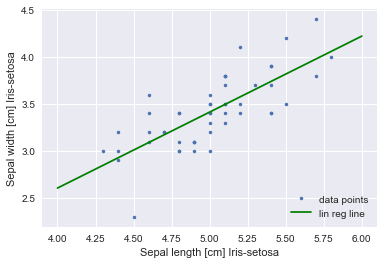

In [4]:
# the remaining analysis will focus only on Iris-setosa
sepalLengthSetosa = np.array(df['SepalLengthCm'][df['Species'] == 'Iris-setosa'])
sepalWidthSetosa = np.array(df['SepalWidthCm'][df['Species'] == 'Iris-setosa'])

# linear regression
a, b = np.polyfit(sepalLengthSetosa, sepalWidthSetosa, 1)

# regression line
x = np.linspace(4, 6, 10)
y = a * x + b

# scatter plot with regression
plt.plot(sepalLengthSetosa, sepalWidthSetosa, marker='.', linestyle='none', label='data points')
plt.plot(x, y, color='green', label='lin reg line')
plt.legend(loc='lower right')
plt.xlabel('Sepal length [cm] Iris-setosa')
plt.ylabel('Sepal width [cm] Iris-setosa');

In order to use bootstrap technique for linear regression, the following function was used:

    def draw_bs_pairs_linreg(x, y, size=1):
        """Perform pairs bootstrap for linear regression."""

        # Set up array of indices to sample from: inds
        inds = np.arange(len(x))

        # Initialize replicates: bs_slope_reps, bs_intercept_reps
        bs_slope_reps = np.empty(size)
        bs_intercept_reps = np.empty(size)

        # Generate replicates
        for i in range(size):
            bs_inds = np.random.choice(inds, size=len(inds))
            bs_x, bs_y = x[bs_inds], y[bs_inds]
            bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

        return bs_slope_reps, bs_intercept_reps

random choice function acts here on the indices of the data set and reorders two data sets. This type of function can be easily remade to use a function of choice instead of numpy.polyfit.
In the example below we will use the function 100 times to receive the slope and intercept coefficients of linear regression.

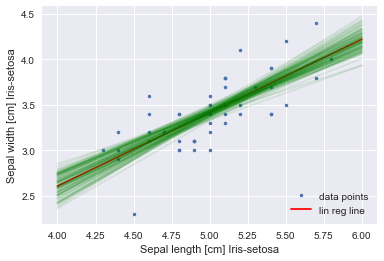

In [5]:
# running bootstrap regression
bs_slope, bs_inter = draw_bs_pairs_linreg(sepalLengthSetosa, sepalWidthSetosa, 100)

# scatter plot with regression
plt.plot(sepalLengthSetosa, sepalWidthSetosa, marker='.', linestyle='none', label='data points')
plt.plot(x, y, color='red', label='lin reg line')
for i in range(len(bs_slope)):
    plt.plot(x, bs_slope[i] * x + bs_inter[i], color='green', alpha=0.1)
plt.legend(loc='lower right')
plt.xlabel('Sepal length [cm] Iris-setosa')
plt.ylabel('Sepal width [cm] Iris-setosa');